# ロジスティク回帰
ロジスティク回帰とはある現状の発生率を、複数の因子の組み合わせとそれらの程度からモデル化する方法である。<br>
ここで、ある現象の発生率$p(X)$を調べたいとする。<br>
その原因となる可能性があるもの(因子・変数・説明変数・独立変数などと呼ばれる)$x_1,x_2,…,x_n$を考える。(因子をまとめて、$x=(x_1,x_2,…,x_n)と書ける。) <br>

この現象を、因子が起こったときの条件付き確率として考えると、<br>

$$p(X)=Probability(発生|x)$$

と表現できる。 <br>
また、関数$F(x_1,x_2,…,x_n)$を使って、<br>
$$p(X) = Probability(発生|x)=F(x_1,x_2,…,x_n)$$
とすると、$F$で$p(X)$をモデル化することができる。<br>
ロジスティクス回帰分析では、この関数$F$にロジスティクス関数をを使います。<br>
ロジスティクス関数$f$は、一般に$r$として、<br>
$$f=\frac{1}{1+\exp(-r)}$$
という形をしている。<br>
今回の変数は、$x_1,x_2,…,x_n$の因子群(変数・説明変数・独立変数)である。これを <br>
$$z=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + … + \beta_n x_n$$
の線形結合に合成して、
$$f=\frac{1}{1+\exp(-z)}$$
として発生確率をモデル化する。<br>
なので、ロジスティク回帰分析では、ロジスティク関数を通じて、因子群と発生確率を結びつける。<br>
$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + … + \beta_n$は、回帰係数と呼ばれます。<br>
このロジスティクス回帰モデルをデータから推定することをロジスティク回帰分析と言う。分析によって回帰係数が求まり、因子の影響と発生確率の関係を知ることができる。

# 交差エントロピー誤差関数
交差エントロピーは、「情報量」の「期待値」である。

$$ \begin{eqnarray} 
交差エントロピー &=& H(p,q) \\
 &=& 期待値 \\
 &=& \sum _{x}確率 \times 実現値 \\
 &=& \sum _{x}確率 \times 情報量 \\
 &=& \sum _{x}p(x) \times (-\log q(x)) \\
 &=& - \sum _{x}p(x) \times \log q(x)\\
\end{eqnarray}$$


交差エントロピーは、試行を行って得られた情報量を間違った確率分布$q$を基にして算出したときの情報量の期待値である。<br>
$p$...試行の確率 <br>
$log(q)$...情報量 <br>
- 式の意味 <br>
  確率分布$q$が、正しい確率分布$p$と異なるほど大きい値になる。
- 最小値
  交差エントロピーは、正しい確率分布$p$と同じ時、最小値になる。
  また、実際に代入するとわかりますが、$q$が$p$と同じ時、交差エントロピーの値はエントロピーのエントロピーの値と同じになる。

# シグモイド関数
シグモイド関数はの数式とグラフは以下になる。
$$f(x)=\dfrac{1}{1+e^{-ax}}\: (a > 0)$$
グラフからも分かるように以下のような性質がある。<br>
1：f(0)=12 <br>
2：limx→∞f(x)=1，limx→−∞f(x)=0 <br>
3：f(x) は単調増加 <br>
4：f(x)+f(−x)=1 。つまり y=f(x) は(0,12) に関して点対称。<br>
シグモイド関数からの出力が必ず$0〜1$となるので、その範囲で閾値を設けることにより、二値分類をすることが可能となる。

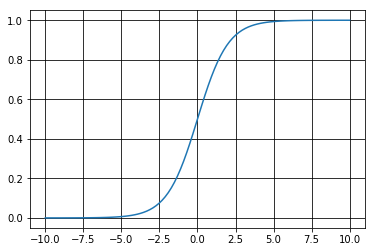

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 100)
y  = 1 /(1 + np.exp(-1 * x))
plt.plot(x, y)
plt.grid(which='major',color='black',linestyle='-')

# 正則化
## 正則化とは

英語ではRegularizationと言う。正則化とは簡単に言うと「モデルの過適合を防ぐ」ために必要なものである。<br>
過適合の問題は，予測・分類系の手法を用いる際には常に付き纏う問題で，分析においては必ず考慮しなくてはならない問題なのである。<br>
前述したように正則化は「過適合」を防ぐためのものであるが，最近はそれだけでなく変数選択（モデル選択）を同時に行ってくれる正則化もあるようである。

## L1,L2正則化
英語ではL1正則化をLasso，L2正則化をRidgeといい，これらを取り入れた回帰分析をそれぞれ，LassoRegression, RidgeRegressionと言う。<br>
Lasso正則化を取り入れた分析を行うと，データの持つ多数の変数から特に重要なものだけシステマティックに選択したモデル構築ができる。

## Lasso(L1正則化)の利点
Lassoの利点は多数の変数から特に重要なものをシステマティックに選んでモデル構築をしてくれるところである。<br>
この利点を例えて言うと，リサイクルとゴミの分別に例えられる。Lassoを用いない回帰分析においては，結果を出す（リサイクル品を作る）ためには，ゴミと資源の分別（変数の選択）を，人間が行わなければなりません。しかしLassoを用いると，分別はLassoが自動で行い，有用と判断されたもの（資源）で結果を出している。<br>
これは，ゴミか有用か判断が難しい変数でも，とりあえず入れておけばLassoが判断して分別してくれることを意味しており，これまで厳選された少しの変数でしか出来なかった分析が，不純物混じりの多くの変数でも可能となることを意味している。

# 平均二乗誤差と交差エントロピー誤差
回帰問題は予測値と正解値との差を定量として扱うことが可能なため、平均二乗誤差が使用可能である。しかし、分類問題の場合は正解ラベルに対して予測した結果が定量ではなく確率で帰ってくる。そのため、確率を情報量として扱う必要があるので、交差エントロピーを使用する。